# Examining the Qubits in Qiskit
Let's write our first qunatum computer program using Qiskit and Python.


# Playing with Qubits in Qiskit
Step 1. 
Install the Qiskit visualization onto the virtual machine.
Hit the play button to load the libraries in Google Colab.

In [ ]:
pip install qiskit[visualization];

Step 2. 
Install the Qiskit Python libraries.
Hit the play button to load the Qiskit libraries into your environment.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import ZGate, XGate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

from qiskit import IBMQ

Step 3. 
Load your local libraries. 
This is the section we will be modifying when we develop and update our own libraries.
Press play button to load.

In [5]:
# function: InitializeCircuit
#   This function initializes a Qiskit circuit based on the Dirac notation
#   of the Qubit(s) and the number of Qubits.
#
# Arguments: NONE
# Returns:   Quantum Circuit
#
# Example:
#   InitializeCircuit('0',1)       # |0>
#   InitializeCircuit('00',2)      # |00>
#   InitializeCircuit('01',2)
#
def InitializeCircuit(i,numQubits):
  i=i[::-1]
  circuit = QuantumCircuit(numQubits, numQubits)
  circuit.initialize(i, circuit.qubits)
  return circuit

# function: RunCircuit
#   This function runs a quantum circuit 
#   and returns the state vector.
#
# Arguments: Quantum Circuit
# Returns:   State Vector (array)
#
# Example:
#   qc = InitializeCircuit('0',1)       # |0>
#   RunCircuit(qc)
#   print(out_state) # Display the output state vector
#
#      Statevector([1.+0.j, 0.+0.j],
#                dims=(2,))
#
def RunCircuit(circuit):
  circuit.save_statevector()
  compiled_circuit = transpile(circuit, simulator)
  result = simulator.run(compiled_circuit).result() 
  out_state = result.get_statevector()
  return out_state


Example 1: Create a basic quantum circuit of only one qubit with state 0. |0>

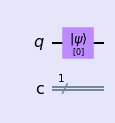

In [4]:
# Example 1: Create a basic single qubit circuit with state 0.
# MAIN ------------------------
# initialize the simulator
simulator = QasmSimulator()
# create the basic single quit circuit |0>
qubitState = '0'
numQubits = 1
circuit = InitializeCircuit(qubitState,numQubits) 
# draw the circuit
style = {'backgroundcolor': 'lavender'}
circuit.draw(output='mpl', style = style)


# Understanding Qubits and State Vectors
Qubit states are represented as column state vectors.
Qubits are denoted in Dirac (bra-ket) notation, |0>.
The qubits use "ket" notation which means these are column vectors. The Qiskit data structure is a 2-element array for the 2-element column state vector.

State 0:

$|0>=\begin{bmatrix}
1 \\
0
\end{bmatrix}$          Qiskit $|0>=\begin{bmatrix}
1.+0.j \\
0.+0.j
\end{bmatrix}$

State 1:

$|1>=\begin{bmatrix}
0 \\
1
\end{bmatrix}$     Qiskit $|1>=\begin{bmatrix}
0.+0.j \\
1.+0.j
\end{bmatrix}$

The j in the state vectors represents i for imaginary numbers. The state vectors are real-complex numbers.

The qubit state vectors are orthoganal (their dot product = 0).
Using the Dirac notation for the dot product we have,

$<0|1> = \begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
0 \\ 
1
\end{bmatrix}$ = (1x0)+(0x1) = 0 


Example 2: Examine the state vector of the 1 qubit system where the state is |0>.


In [6]:
out_state = RunCircuit(circuit)
print(out_state) # Display the output state vector


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Example 3: Examine the state vector of a 1 qubit system where the state is |1>.

In [7]:
# create the basic single quit circuit |1>
qubitState = '1'
numQubits = 1
circuit = InitializeCircuit(qubitState,numQubits) 
out_state = RunCircuit(circuit)
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
